In [1]:
import pandas as pd

column_names = ["age", "sector", "edu", "marriage", "occupation", "race", "sex", "hours", "country", "target"]
train_data = pd.read_csv("./data/income.train.txt.5k", names=column_names)
dev_data = pd.read_csv("./data/income.dev.txt", names=column_names)

# display train data head and dev data head
display("------------------------------------------------- Train Data -------------------------------------------------" , train_data.head())
display("-------------------------------------------------- Dev Data --------------------------------------------------" , dev_data.head())


'------------------------------------------------- Train Data -------------------------------------------------'

,age,sector,edu,marriage,occupation,race,sex,hours,country,target
0,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,White,Male,13,United-States,<=50K
1,38,Private,HS-grad,Divorced,Handlers-cleaners,White,Male,40,United-States,<=50K
2,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Black,Male,40,United-States,<=50K
3,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female,40,Cuba,<=50K
4,37,Private,Masters,Married-civ-spouse,Exec-managerial,White,Female,40,United-States,<=50K


'-------------------------------------------------- Dev Data --------------------------------------------------'

,age,sector,edu,marriage,occupation,race,sex,hours,country,target
0,45,Federal-gov,Bachelors,Married-civ-spouse,Adm-clerical,White,Male,45,United-States,<=50K
1,33,Private,5th-6th,Married-spouse-absent,Transport-moving,Other,Male,20,El-Salvador,<=50K
2,19,Private,Some-college,Never-married,Transport-moving,White,Male,40,United-States,<=50K
3,47,Private,11th,Divorced,Other-service,White,Female,15,United-States,<=50K
4,30,Local-gov,HS-grad,Married-civ-spouse,Protective-serv,White,Male,40,United-States,>50K


In [2]:
# encoded train data using pd.get_dummies (not very effective)
pd.get_dummies(train_data, columns=["age", "sector"]).head()

,edu,marriage,occupation,race,sex,hours,country,target,age_17,age_18,...,age_81,age_88,age_90,sector_ Federal-gov,sector_ Local-gov,sector_ Private,sector_ Self-emp-inc,sector_ Self-emp-not-inc,sector_ State-gov,sector_ Without-pay
0,Bachelors,Married-civ-spouse,Exec-managerial,White,Male,13,United-States,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
1,HS-grad,Divorced,Handlers-cleaners,White,Male,40,United-States,<=50K,False,False,...,False,False,False,False,False,True,False,False,False,False
2,11th,Married-civ-spouse,Handlers-cleaners,Black,Male,40,United-States,<=50K,False,False,...,False,False,False,False,False,True,False,False,False,False
3,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female,40,Cuba,<=50K,False,False,...,False,False,False,False,False,True,False,False,False,False
4,Masters,Married-civ-spouse,Exec-managerial,White,Female,40,United-States,<=50K,False,False,...,False,False,False,False,False,True,False,False,False,False


# Naive Binarization

In [3]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(train_data)

train_binary_data = encoder.transform(train_data)
dev_binary_data = encoder.transform(dev_data)

feature_dimension_size = train_binary_data.shape[1]
print("Feature dimension size:", len(encoder.get_feature_names_out()) - 2)
# print(encoder.get_feature_names_out())

Feature dimension size: 230


[k]	[Train Error]	[Dev Error]	[Train Positive Rate]	[Dev Positive Rate]	[Run Time (ms)]
1	0.015		0.232		0.251			0.248			803
3	0.115		0.180		0.232			0.222			493
5	0.144		0.165		0.229			0.197			502
7	0.155		0.169		0.219			0.209			507
9	0.166		0.161		0.217			0.199			523
11	0.169		0.168		0.208			0.188			565
13	0.167		0.165		0.203			0.181			593
15	0.170		0.163		0.199			0.185			574
17	0.170		0.163		0.194			0.187			516
19	0.171		0.161		0.192			0.185			529
21	0.172		0.162		0.191			0.188			615
23	0.175		0.160		0.191			0.182			666
25	0.174		0.162		0.188			0.176			535
27	0.175		0.162		0.189			0.176			587
29	0.178		0.164		0.184			0.178			574
31	0.177		0.158		0.183			0.178			590
33	0.176		0.160		0.190			0.186			540
35	0.177		0.159		0.185			0.179			549
37	0.177		0.162		0.183			0.178			526
39	0.174		0.158		0.184			0.184			520
41	0.177		0.159		0.185			0.185			561
43	0.175		0.161		0.182			0.183			596
45	0.175		0.163		0.183			0.181			581
47	0.178		0.164		0.182			0.180			539
49	0.179		0.160		0.179			0.17

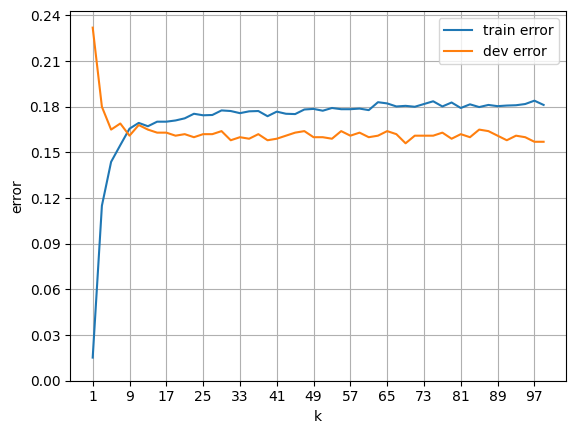

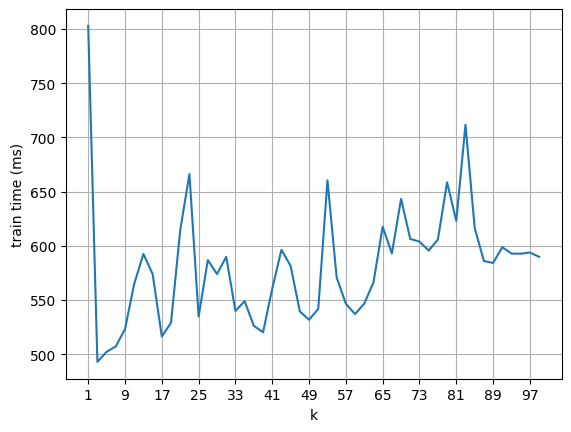

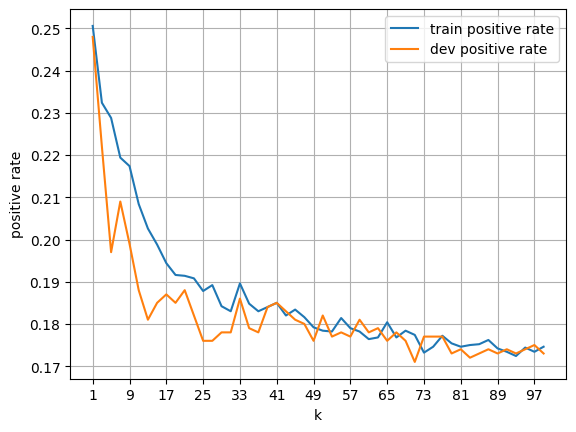

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from evaluate import evaluate_sklearn_knn

X_train = train_binary_data[:, :feature_dimension_size - 2]
X_test = dev_binary_data[:, :feature_dimension_size - 2]
y_train = train_binary_data[:, feature_dimension_size - 2:]
y_test = dev_binary_data[:, feature_dimension_size - 2:]

evaluate_sklearn_knn(X_train, y_train, X_test, y_test)


# Smart Binarization without Numerical Features Scaling

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_processor = 'passthrough' # i.e., no transformation
cat_processor = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

num_columns = list(train_data.select_dtypes(include=['int64', 'float64']).columns)
cat_columns = list(train_data.select_dtypes(include=['object']).columns)

preprocessor = ColumnTransformer([
           ('num', num_processor, num_columns),
           ('cat', cat_processor, cat_columns)
       ])

preprocessor.fit(train_data)
train_num_cat_bin_data = preprocessor.transform(train_data)
dev_num_cat_bin_data = preprocessor.transform(dev_data)
feature_dimension_size = train_num_cat_bin_data.shape[1]

print("Feature dimension size:", len(preprocessor.get_feature_names_out()) - 2)
# preprocessor.get_feature_names_out()

Feature dimension size: 92


Data Shapes --------------------------------------
X_train		X_test		y_train		y_test
(5000, 92)	(1000, 92)	(5000, 2)	(1000, 2)

[k]	[Train Error]	[Dev Error]	[Train Positive Rate]	[Dev Positive Rate]	[Run Time (ms)]
1	0.015		0.269		0.251			0.273			433
3	0.130		0.240		0.249			0.250			396
5	0.156		0.234		0.232			0.256			414
7	0.168		0.233		0.228			0.239			396
9	0.183		0.222		0.221			0.222			423
11	0.188		0.219		0.219			0.221			425
13	0.190		0.217		0.219			0.209			410
15	0.192		0.215		0.214			0.209			418
17	0.195		0.221		0.209			0.201			426
19	0.197		0.214		0.208			0.196			458
21	0.198		0.217		0.204			0.197			456
23	0.203		0.223		0.198			0.197			439
25	0.201		0.221		0.194			0.191			432
27	0.208		0.220		0.192			0.192			444
29	0.215		0.213		0.187			0.181			441
31	0.209		0.214		0.183			0.188			443
33	0.214		0.207		0.174			0.175			450
35	0.214		0.213		0.173			0.171			465
37	0.214		0.217		0.173			0.175			452
39	0.217		0.218		0.167			0.184			458
41	0.217		0.218		0.160			0.172			469
43	0.216		0.2

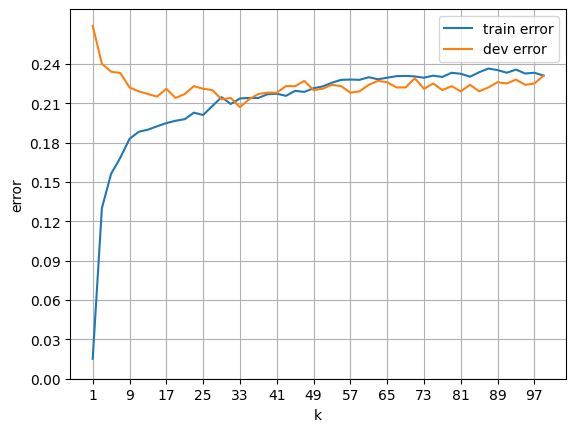

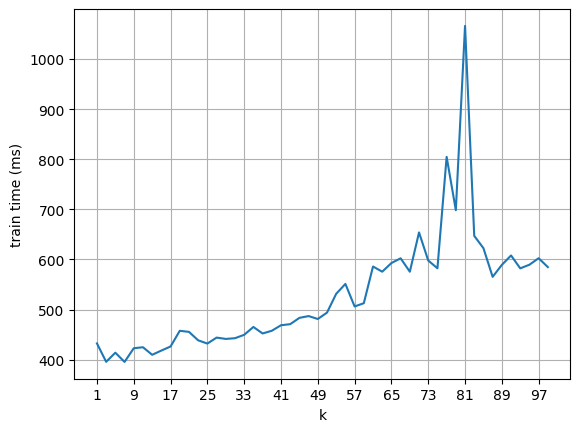

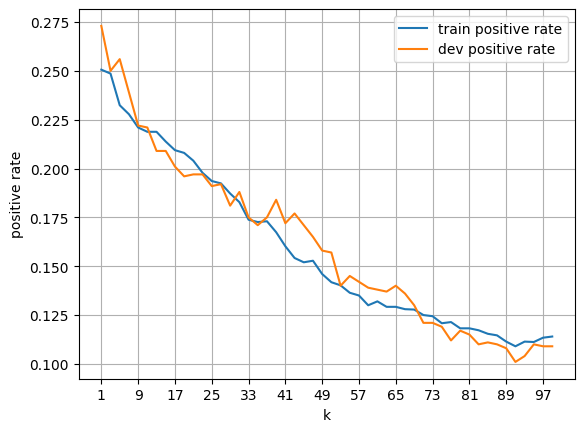

In [6]:
X_train = train_num_cat_bin_data[:, :feature_dimension_size - 2]
X_test = dev_num_cat_bin_data[:, :feature_dimension_size - 2]
y_train = train_num_cat_bin_data[:, feature_dimension_size - 2:]
y_test = dev_num_cat_bin_data[:, feature_dimension_size - 2:]

# print data stats
print("Data Shapes --------------------------------------")
print("X_train\t\tX_test\t\ty_train\t\ty_test")
print("{}\t{}\t{}\t{}\n".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

evaluate_sklearn_knn(X_train, y_train, X_test, y_test)

# Smart Binarization with Numerical Features Scaling

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

num_processor = MinMaxScaler(feature_range=(0, 2))
cat_processor = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

num_columns = list(train_data.select_dtypes(include=['int64', 'float64']).columns)
cat_columns = list(train_data.select_dtypes(include=['object']).columns)

preprocessor = ColumnTransformer([
           ('num', num_processor, num_columns),
           ('cat', cat_processor, cat_columns)
       ])

preprocessor.fit(train_data)
train_num_cat_bin_data = preprocessor.transform(train_data)
dev_num_cat_bin_data = preprocessor.transform(dev_data)
feature_dimension_size = train_num_cat_bin_data.shape[1]

print("Feature dimension size:", len(preprocessor.get_feature_names_out()) - 2)
# preprocessor.get_feature_names_out()

Feature dimension size: 92


Data Shapes --------------------------------------
X_train		X_test		y_train		y_test
(5000, 92)	(1000, 92)	(5000, 2)	(1000, 2)

[k]	[Train Error]	[Dev Error]	[Train Positive Rate]	[Dev Positive Rate]	[Run Time (ms)]
1	0.015		0.237		0.251			0.269			485
3	0.115		0.192		0.241			0.260			479
5	0.138		0.183		0.239			0.247			423
7	0.141		0.168		0.238			0.242			387
9	0.155		0.159		0.236			0.223			451
11	0.163		0.163		0.235			0.211			473
13	0.163		0.164		0.235			0.218			452
15	0.164		0.157		0.232			0.219			474
17	0.166		0.161		0.228			0.215			479
19	0.169		0.164		0.224			0.208			711
21	0.170		0.159		0.223			0.211			594
23	0.171		0.154		0.222			0.216			523
25	0.170		0.150		0.223			0.212			476
27	0.169		0.156		0.221			0.208			583
29	0.170		0.152		0.220			0.208			482
31	0.171		0.152		0.218			0.212			528
33	0.171		0.155		0.217			0.213			490
35	0.172		0.150		0.214			0.208			502
37	0.172		0.148		0.213			0.210			486
39	0.173		0.147		0.213			0.209			540
41	0.174		0.143		0.209			0.205			550
43	0.174		0.1

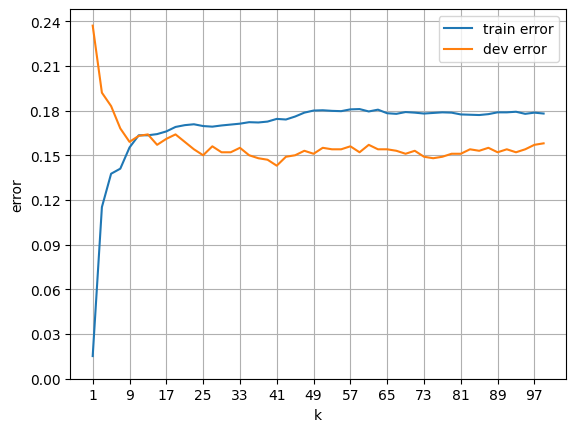

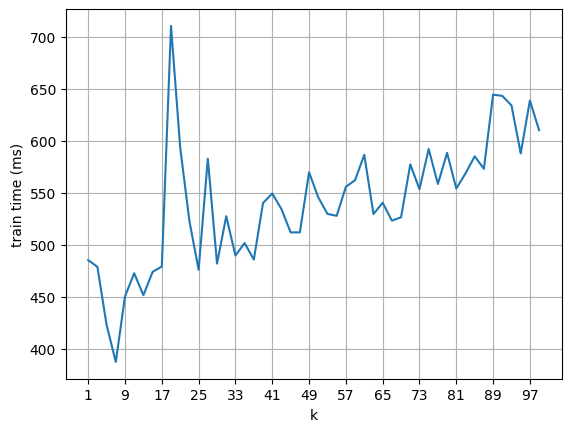

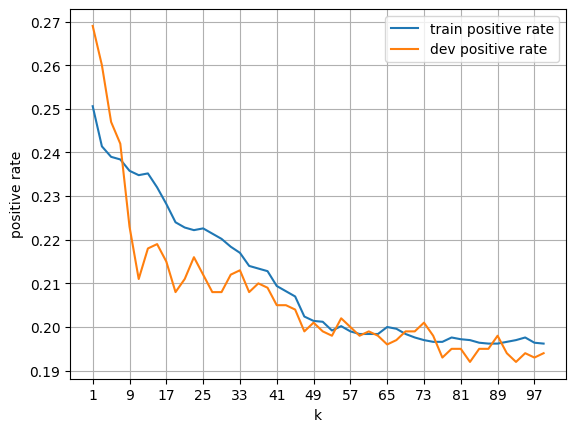

In [8]:
X_train = train_num_cat_bin_data[:, :feature_dimension_size - 2]
X_test = dev_num_cat_bin_data[:, :feature_dimension_size - 2]
y_train = train_num_cat_bin_data[:, feature_dimension_size - 2:]
y_test = dev_num_cat_bin_data[:, feature_dimension_size - 2:]

# print data stats
print("Data Shapes --------------------------------------")
print("X_train\t\tX_test\t\ty_train\t\ty_test")
print("{}\t{}\t{}\t{}\n".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

evaluate_sklearn_knn(X_train, y_train, X_test, y_test)

# Custom KNN Classifier

In [9]:
import numpy as np

knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

# top 3 nearest neighbors of the first element of the dev data
nearest_3_dist, nearest_3_idx = list(map(lambda x: list(x.flatten()), knn_classifier.kneighbors([X_test[0]], n_neighbors=3)))
print("Top 3 nearest neighbors of the first element of the dev data")
print("Index\tDistance")
for i in range(3):
    print("{}\t{:.3f}".format(nearest_3_idx[i], nearest_3_dist[i]))
print()
!sed -n {nearest_3_idx[0] + 1}p ./data/income.train.txt.5k
!sed -n {nearest_3_idx[1] + 1}p ./data/income.train.txt.5k
!sed -n {nearest_3_idx[2] + 1}p ./data/income.train.txt.5k


def compute_distance(v1, v2, option=2):
    dv = v1 - v2
    if option == 1:
        return sum(abs(dv))
    return np.sqrt(sum(dv ** 2))

print()
for i in nearest_3_idx:
    print(compute_distance(X_test[0], X_train[i], option=2))


Top 3 nearest neighbors of the first element of the dev data
Index	Distance
4872	0.334
4787	1.415
2591	1.417

33, Federal-gov, Bachelors, Married-civ-spouse, Adm-clerical, White, Male, 42, United-States, >50K
47, Federal-gov, Bachelors, Married-civ-spouse, Adm-clerical, White, Male, 45, Germany, >50K
48, Federal-gov, Bachelors, Married-civ-spouse, Prof-specialty, White, Male, 44, United-States, >50K

0.3344192869821078
1.4152746869361013
1.4167469717499104


[k]	[Train Error]	[Dev Error]	[Train Positive Rate]	[Dev Positive Rate]	[Run Time (ms)]
1	0.015		0.239		0.251			0.273			5661
3	0.114		0.196		0.239			0.254			5886
5	0.137		0.178		0.236			0.244			5743
7	0.143		0.166		0.238			0.240			6328
9	0.154		0.153		0.236			0.225			5888
11	0.165		0.164		0.236			0.212			5719
13	0.165		0.167		0.235			0.219			5935
15	0.164		0.159		0.231			0.219			5697
17	0.167		0.158		0.228			0.216			5874
19	0.167		0.164		0.225			0.208			5757
21	0.169		0.162		0.222			0.210			5683
23	0.170		0.155		0.223			0.217			5896
25	0.169		0.156		0.224			0.214			5754
27	0.169		0.156		0.222			0.208			5749
29	0.170		0.151		0.218			0.211			5622
31	0.169		0.152		0.219			0.212			6124
33	0.170		0.156		0.216			0.214			5951
35	0.172		0.153		0.214			0.207			5758
37	0.172		0.149		0.215			0.209			5635
39	0.173		0.148		0.213			0.206			5674
41	0.174		0.144		0.209			0.204			5724
43	0.174		0.149		0.208			0.205			5879
45	0.178		0.148		0.209			0.206			7268
47	0.179		0.152		0.202			0.198			7282
49	0.

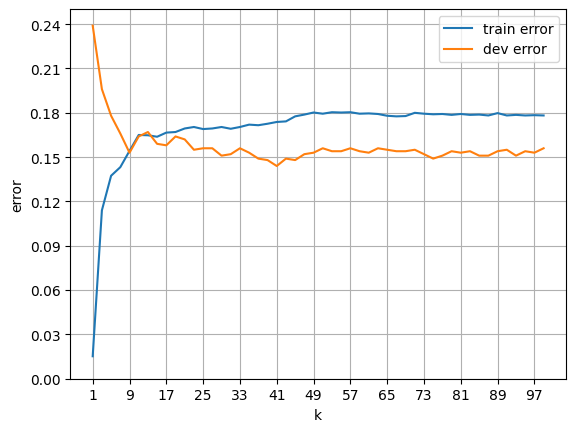

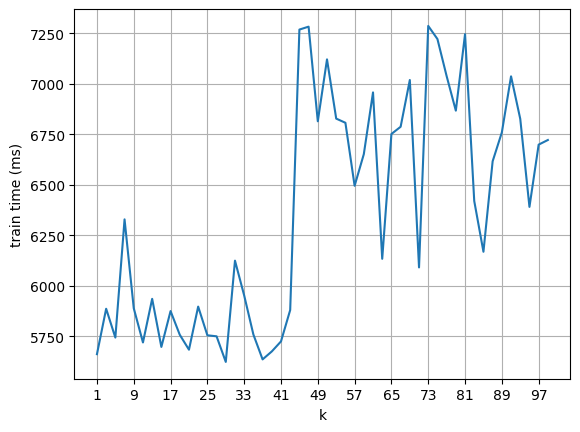

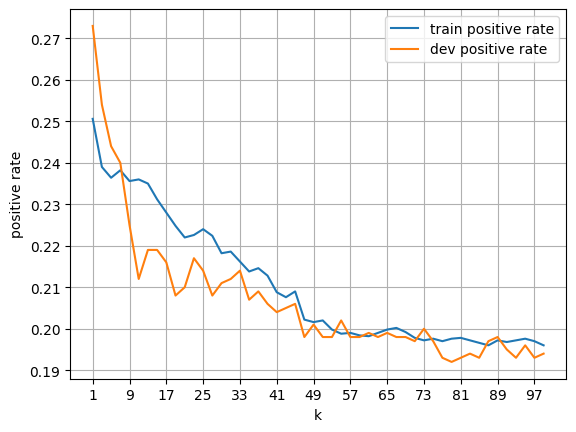

In [12]:
from knn_classifier import KNNClassifier
from evaluate import evaluate_custom_knn

# custom knn evaluation using Euclidean distance
evaluate_custom_knn(X_train, y_train, X_test, y_test, order=2)

[k]	[Train Error]	[Dev Error]	[Train Positive Rate]	[Dev Positive Rate]	[Run Time (ms)]
1	0.015		0.240		0.251			0.272			5712
3	0.116		0.197		0.239			0.261			5448
5	0.140		0.176		0.239			0.250			5587
7	0.145		0.166		0.240			0.240			5488
9	0.155		0.162		0.236			0.222			5362
11	0.162		0.163		0.234			0.219			5411
13	0.165		0.165		0.236			0.223			5553
15	0.168		0.163		0.228			0.217			5506
17	0.169		0.155		0.228			0.211			5644
19	0.170		0.160		0.225			0.210			5688
21	0.170		0.166		0.222			0.212			5490
23	0.171		0.162		0.223			0.216			5555
25	0.170		0.157		0.221			0.211			5461
27	0.169		0.158		0.218			0.206			5533
29	0.168		0.160		0.213			0.206			5516
31	0.170		0.159		0.212			0.205			5718
33	0.170		0.158		0.210			0.202			5745
35	0.169		0.151		0.211			0.205			5547
37	0.172		0.146		0.209			0.206			5492
39	0.174		0.143		0.208			0.205			5505
41	0.174		0.141		0.211			0.205			5522
43	0.174		0.146		0.208			0.204			5569
45	0.177		0.149		0.203			0.199			5578
47	0.178		0.154		0.201			0.202			5525
49	0.

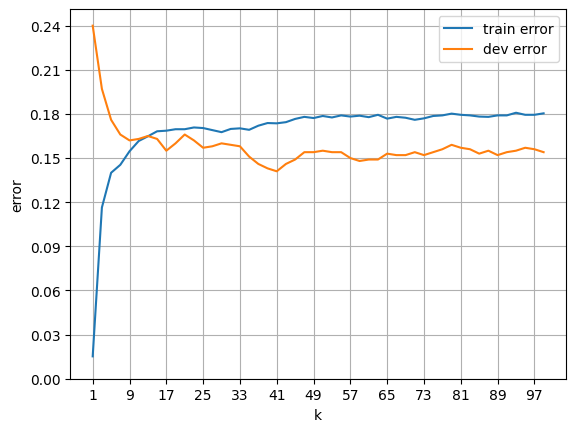

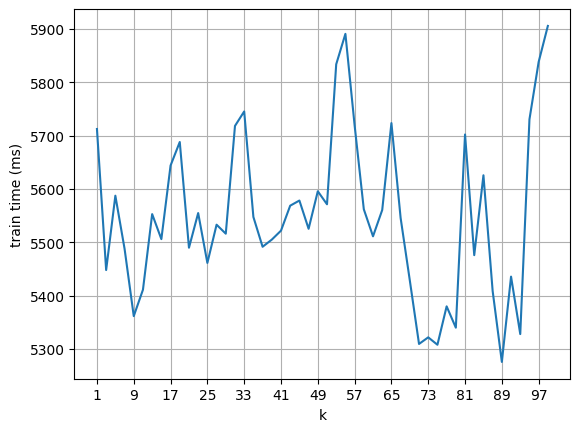

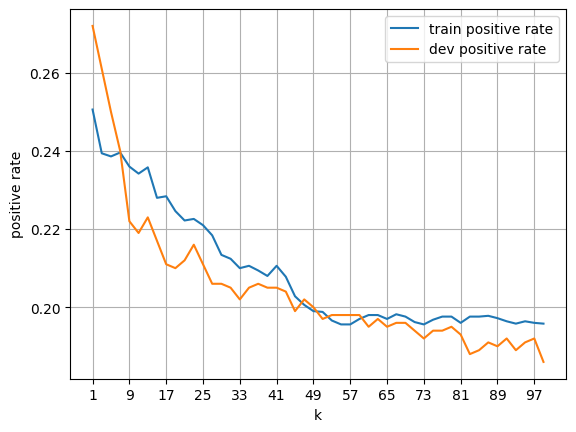

In [11]:
from evaluate import evaluate_custom_knn

# custom knn evaluation using manhattan distance
evaluate_custom_knn(X_train, y_train, X_test, y_test, order=1)